In [3]:
import pandas as pd

airbnb_data = "C:\\Users\\rache\\Downloads\\cse2600\\airbnb_data\\Airbnb_data_cleaned2.csv" #path for csv

df = pd.read_csv(airbnb_data) #read in the data

print('Rows:', len(df)) #num of rows
print('Columns:', len(df.columns)) #num of columns

Rows: 80762
Columns: 18


In [4]:
df_no_outliers = df[df["price_outlier"] == 0]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)

train, test = train_test_split(df_no_outliers, train_size=64609, random_state=42)
#chose 64609 cuz thats 80%

# Split data into features (X) and target (y) for training and testing
y_train = train['price']
X_train = train.drop(['price'], axis=1)
y_test = test['price']
X_test = test.drop(['price'], axis=1)

In [6]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import mean_squared_error

leaf_sizes = list(range(2,21))
cv_scores = []

for size in leaf_sizes:
    model = DTR(max_leaf_nodes=size, random_state=2)
    # use neg_mean_squared_error or r2 for scoring
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores['test_score'])   # negative MSE
    cv_scores.append(mean_score)

best_size = leaf_sizes[np.argmax(cv_scores)]
print("\nBest number of leaf nodes:", best_size)

final_model = DTR(max_leaf_nodes=best_size, random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (best model): {test_mse:.4f}")


Best number of leaf nodes: 20
Test MSE (best model): 5544.8904


In [7]:
tree = DTR(max_leaf_nodes=20)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,ccp_alpha,0.0


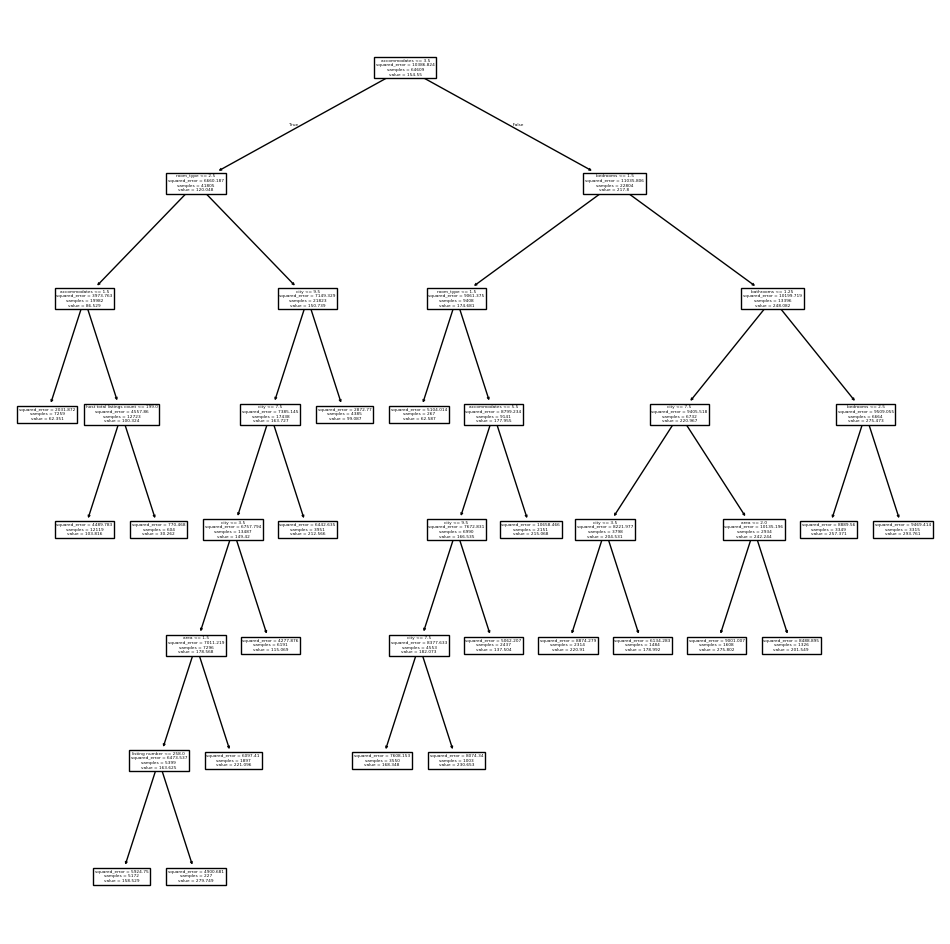

In [8]:
from matplotlib.pyplot import subplots
feature_names = list(X_train.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(tree,
          feature_names=feature_names,
          ax=ax);

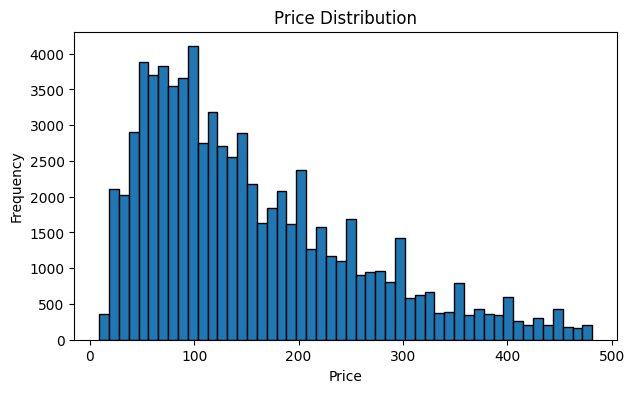

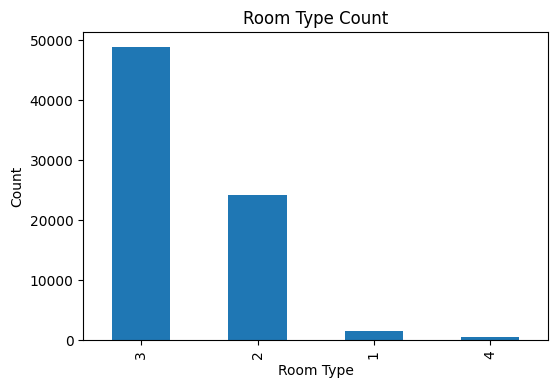

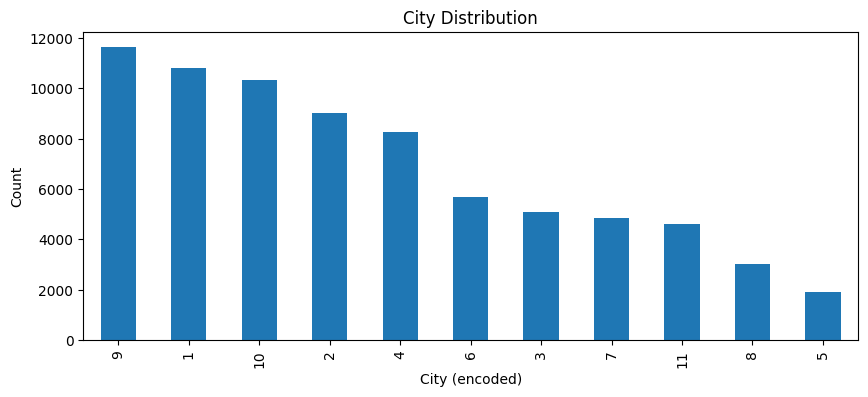

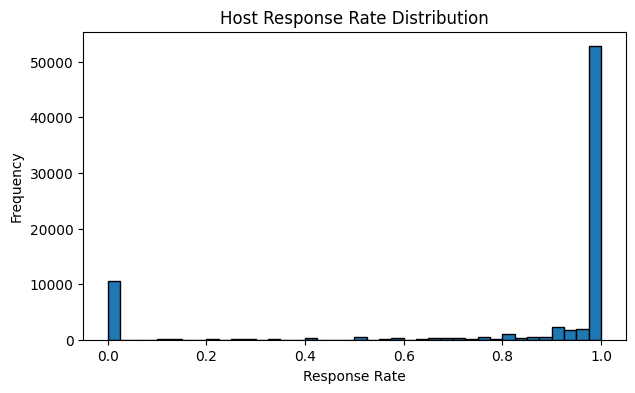

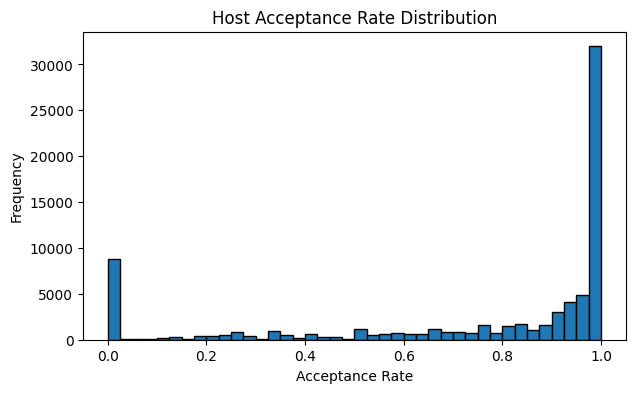

In [9]:
# Graphs
import matplotlib.pyplot as plt

# Price Distribution
plt.figure(figsize=(7,4))
plt.hist(df_no_outliers['price'], bins=50, edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Ratings Distribution
if 'rating' in df_no_outliers.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df_no_outliers['rating'], bins=40, edgecolor='black')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

# Reviews Distribution
if 'number_of_reviews' in df_no_outliers.columns:
    plt.figure(figsize=(7,4))
    plt.hist(df_no_outliers['number_of_reviews'], bins=50, edgecolor='black')
    plt.title("Number of Reviews Distribution")
    plt.xlabel("Reviews")
    plt.ylabel("Frequency")
    plt.show()

# Room Type Count
if 'room_type' in df_no_outliers.columns:
    plt.figure(figsize=(6,4))
    df_no_outliers['room_type'].value_counts().plot(kind='bar')
    plt.title("Room Type Count")
    plt.xlabel("Room Type")
    plt.ylabel("Count")
    plt.show()

# City Distribution 
plt.figure(figsize=(10,4))
df_no_outliers['city'].value_counts().plot(kind='bar')
plt.title("City Distribution")
plt.xlabel("City (encoded)")
plt.ylabel("Count")
plt.show()

# Host Response Rate 
plt.figure(figsize=(7,4))
plt.hist(df_no_outliers['host response rate'], bins=40, edgecolor='black')
plt.title("Host Response Rate Distribution")
plt.xlabel("Response Rate")
plt.ylabel("Frequency")
plt.show()

# Host Acceptance Rate
plt.figure(figsize=(7,4))
plt.hist(df_no_outliers['host acceptance rate'], bins=40, edgecolor='black')
plt.title("Host Acceptance Rate Distribution")
plt.xlabel("Acceptance Rate")
plt.ylabel("Frequency")
plt.show()

Linear Regression MSE: 6405.948471863867


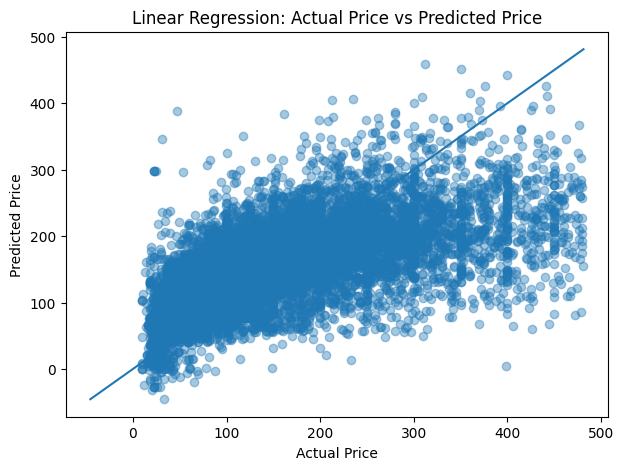

In [10]:
# Liner regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)

print("Linear Regression MSE:", mse_lr)


# Scatter plot of Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_lr, alpha=0.4)

plt.title("Linear Regression: Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

min_val = min(min(y_test), min(pred_lr))
max_val = max(max(y_test), max(pred_lr))
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()

Random Forest MSE: 3762.3763607934397


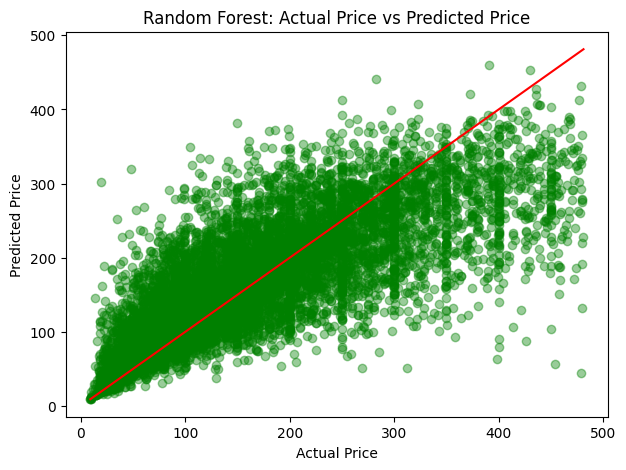

In [11]:
# Random forest regression model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)

print("Random Forest MSE:", mse_rf)




# Scatter plot of Actual vs Predicted for Random Forest
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_rf, alpha=0.4, color='green')

plt.title("Random Forest: Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

min_val = min(min(y_test), min(pred_rf))
max_val = max(max(y_test), max(pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()

In [12]:
# Compare Model Performance
print("Linear Regression MSE:", mse_lr)
print("Random Forest MSE:", mse_rf)

if mse_rf < mse_lr:
    print("Random Forest performed better")
else:
    print("Linear Regression performed better")

Linear Regression MSE: 6405.948471863867
Random Forest MSE: 3762.3763607934397
Random Forest performed better


In [16]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore") 

rf2 = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],         # number of trees
    'max_depth': [None, 5, 10, 20],        # maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']  # number of features to consider at each split
}

# Grid search
grid = GridSearchCV(rf2, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:")
for param, value in grid.best_params_.items():
    print(f"{param}: {value}")

# Evaluate on test set
best_rf = grid.best_estimator_
y_pred_rf2 = best_rf.predict(X_test)

mse_rf2 = mean_squared_error(y_test, y_pred_rf2)

print("Random Forest MSE:", mse_rf2)

Best hyperparameters:
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Random Forest MSE: 3629.803264419165


In [19]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Parameter grid for regression
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4]   # smaller depths work better in regression GBMs
}

# Base model
gbm = GBR(random_state=2)

# Grid search (5-fold CV)
grid = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',   # correct scoring for regression
    n_jobs=-1
)

# Fit on training data
grid.fit(X_train, y_train)

# Best model
best_gbm = grid.best_estimator_

# Predict on test set
y_pred_gbm = best_gbm.predict(X_test)

# Compute MSE
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

print("Best hyperparameters:")
for param, value in grid.best_params_.items():
    print(f"{param}: {value}")

print("\nTest Set MSE:", round(mse_gbm, 4))

Best hyperparameters:
learning_rate: 0.3
max_depth: 4
n_estimators: 300

Test Set MSE: 4015.7586


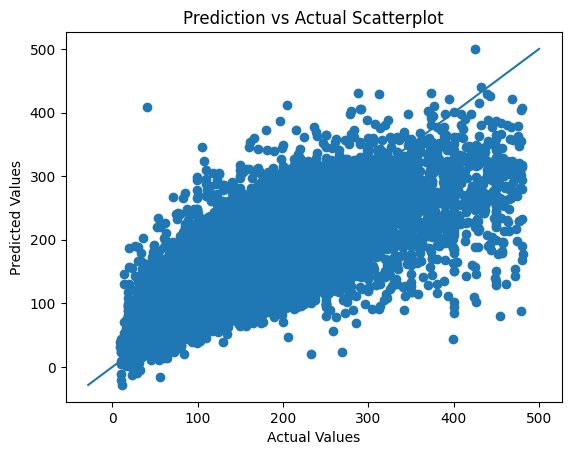

In [20]:
import matplotlib.pyplot as plt

# y_true  = your actual values
# y_pred  = your predicted values

plt.scatter(y_test, y_pred_gbm)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual Scatterplot")

# Add 45-degree line for reference
min_val = min(min(y_test), min(y_pred_gbm))
max_val = max(max(y_test), max(y_pred_gbm))
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()